## Logistic regression
It is not numerical but categorical.

## imports the libraries

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [76]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [77]:
raw_data.describe()

,SAT
count,168.000000
mean,1695.273810
std,183.019017
min,1334.000000
25%,1547.500000
50%,1691.500000
75%,1844.500000
max,2050.000000


In [78]:
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [79]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0 })

In [80]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [81]:
y = data['Admitted']
x1 = data['SAT']

## Let's plot the data

### Scatter plot

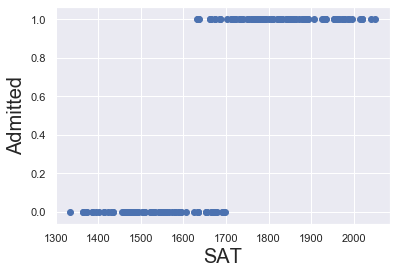

In [82]:
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a regression line

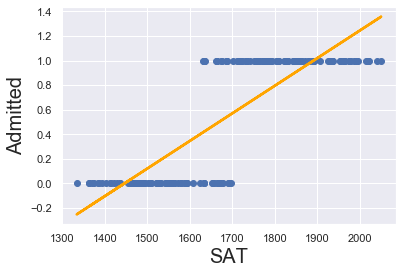

In [83]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y)
y_hat = x1*results_lin.params[1] + results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='orange')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


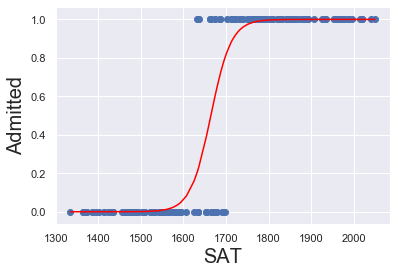

In [85]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='red')
plt.show()

### Logistic Regression Assumptions 
The logistic regress predicts the probability of an event occuring